# Fibonacci numbers
In this tutorial we will discuss how to perform the Fibonacci numbers using *Python*. There is a lot of tutorials on the Internet describing various way to calculate an N-th element of this sequence. We will add extra aspects to these considerations.
### What is the Fibonacci sequence?
At the beginning let's just write what are the Fibonacci numbers: `F(N)`. The two first elements are defined as 0 and 1, i.e. `F(0) = 0`, `F(1) = 1`. The next one is sum of the two previous elements: `F(N) = F(N-2) + F(N-1)`, so the first fifteen elements are equal: `0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377`. Let's see them on the plot:

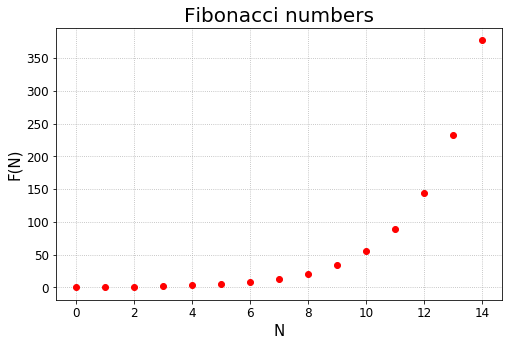

In [1]:
import matplotlib.pyplot as plt

X = range(15)
Y = [0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377]
plt.figure(figsize=(8,5))
plt.plot(X, Y, 'ro')
plt.title('Fibonacci numbers', fontsize=20)
plt.xlabel('N', fontsize=15)
plt.ylabel('F(N)', fontsize=15)
plt.tick_params(labelsize=12)
plt.grid(linestyle='dotted')
plt.show()

OK, now let's define three different functions allowing to compute the N-th element of the sequence:

In [2]:
def fibonacci_recursive(n):
    if n == 0:
        return n
    elif n == 1:
        return n
    else:
        return fibonacci_recursive(n-2) + fibonacci_recursive(n-1)


def fibonacci_iterative(n):
    if not n:
        return n
    
    first, second = 0, 1

    for i in range(n-1):
        first, second = second, first + second
            
    return second


fibonacci_memo_dict = {0:0, 1:1}
def fibonacci_memorization(n):
    global fibonacci_memo_dict
    
    if not n in fibonacci_memo_dict:
        fibonacci_memo_dict[n] = fibonacci_memorization(n-2) + fibonacci_memorization(n-1)
        
    return fibonacci_memo_dict[n]

We have to be sure that the functions are defined correctly. Let's check them for a few arguments:

In [3]:
N = 15
header = " N: recursive iterative memorization"

print("{}\n{}".format(header, "-"*len(header)))
for i in range(N):
    out = "{0:2d}: {1:5d} {2:9d} {3:10d}".format(i, fibonacci_recursive(i), fibonacci_iterative(i), fibonacci_memorization(i))
    print(out)

 N: recursive iterative memorization
------------------------------------
 0:     0         0          0
 1:     1         1          1
 2:     1         1          1
 3:     2         2          2
 4:     3         3          3
 5:     5         5          5
 6:     8         8          8
 7:    13        13         13
 8:    21        21         21
 9:    34        34         34
10:    55        55         55
11:    89        89         89
12:   144       144        144
13:   233       233        233
14:   377       377        377


### Which function is the fastest?
Let's check which function executes the most rapidly. To do this we use the magic command `%%timeit`:

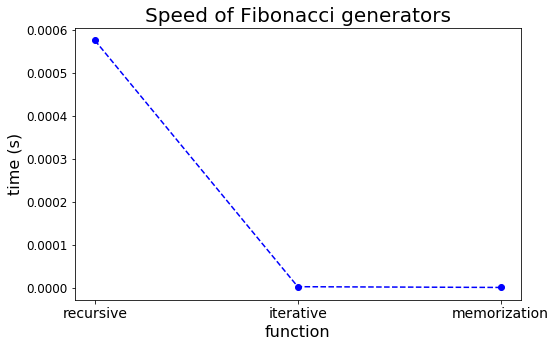

In [4]:
fibonacci_memo_dict = {0:0, 1:1} # reset dictionary

fib_rec_time = %%timeit -q -o fibonacci_recursive(N)
fib_ite_time = %%timeit -q -o fibonacci_iterative(N)
fib_mem_time = %%timeit -q -o fibonacci_memorization(N)
fib_time = (fib_rec_time, fib_ite_time, fib_mem_time)

X = [i for i in range(len(fib_time))]
Y = [ft.average for ft in fib_time]
plt.figure(figsize=(8,5))
plt.plot(X, Y, 'bo--')
plt.title('Speed of Fibonacci generators', fontsize=20)
plt.xlabel('function', fontsize=16)
plt.ylabel('time (s)', fontsize=16)
plt.tick_params(labelsize=12)
x_ticks = ['recursive', 'iterative', 'memorization']
plt.xticks(X, x_ticks, fontsize=14)
plt.show()

We see that the recursive version is very slow compared to other generators. The reason is simple. The return command in the recursive case calls twice `fibonacci_recursive(n-2)`. The first time for the left part of the return statement and then `fibonacci_recursive(n-1)` calls it again. This is redundant. Moreover, a *tree* of calls spreads out very quickly with growing `n` and that is why it exploits CPU resources. Now we focus on the other two functions. Let's compare them more detailed:

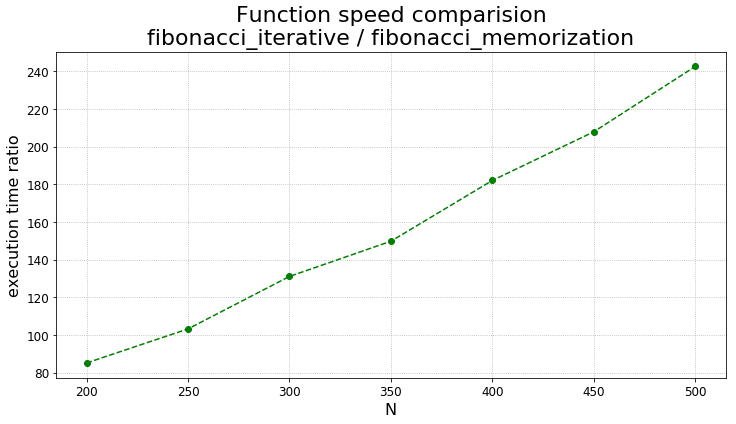

In [5]:
def plot_execution_ratio(x, y, func1_name, func2_name):
    plt.figure(figsize=(12,6))
    plt.plot(x, y, 'go--')
    plt.title('Function speed comparision\n{} / {}'.format(func1_name, func2_name), fontsize=22)
    plt.xlabel('N', fontsize=16)
    plt.ylabel("execution time ratio", fontsize=16)
    plt.tick_params(labelsize=12)
    plt.grid(linestyle='dotted')
    if func1_name == "fibonacci_recursive":
        plt.axhline(y=1.0, color='r', linestyle='-')
    plt.show()

    
def measure_execution_time(func1, func2=fibonacci_memorization, s=50):
    m = 200
    n = 501
    X = []
    Y = []

    for i in range(m, n, s):
        if not func1.__name__ == "fibonacci_recursive":
            global fibonacci_dict
            fibonacci_dict = {0:0, 1:1}

        func1_exe_time = %%timeit -q -o func1(i)
        func2_exe_time = %%timeit -q -o func2(i)
                
        X.append(i)
        Y.append(func1_exe_time.average/func2_exe_time.average)
        
    plot_execution_ratio(X, Y, func1.__name__, func2.__name__)


measure_execution_time(fibonacci_iterative)

We can notice that the `fibonacci_memorization()` function is faster than the iterative version. We investigate it in further analysis.
### Combine intuition and speed
Despite the fact that the recursive and memorization version of the functions seem to be similar, definitely the first definition is more intuitive. We can use the `fibonacci_iterative()` definition to transform it to the memorization version. To do this we use a decorator:

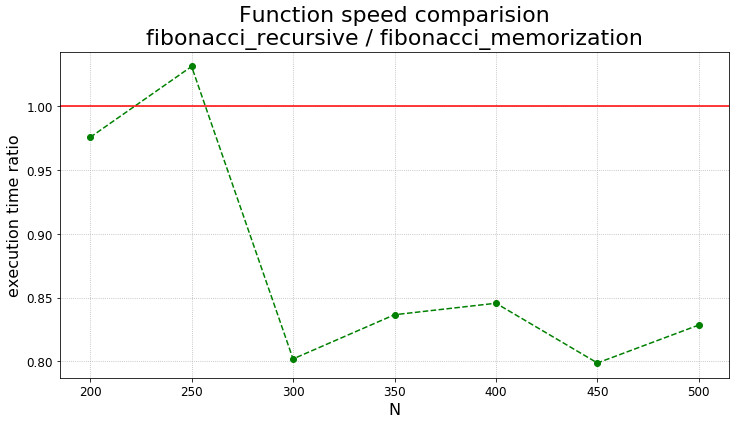

In [6]:
def memorize_results(f):
    results_dict = {}
    
    def func(arg):
        if arg not in results_dict:
            results_dict[arg] = f(arg)
        return results_dict[arg]
    
    func.__name__ = f.__name__
    return func


fibonacci_recursive = memorize_results(fibonacci_recursive)
fibonacci_dict = {0:0, 1:1}
measure_execution_time(fibonacci_recursive)